In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [51]:
defense_data = pd.read_csv('defense_scouting.csv')

In [52]:
defense_data

,Team Number,Draw Bridge,Portcullis,Cheval de Frise,Rough Terrain,Rock Wall,Moat,Ramparts,Low Bar,Sally Port
0,2228,1,0,2,2,2,2,1,2,1
1,1112,2,0,2,2,2,2,1,2,0
2,3455,0,1,2,2,1,2,2,2,0
3,2321,0,1,1,2,1,2,2,2,0
4,1234,0,1,2,2,2,2,2,2,2
5,1123,2,2,1,2,1,2,1,2,1
6,1235,1,1,2,2,2,2,2,2,0
7,5678,1,0,1,1,0,1,1,2,0


In [55]:
arrayed_data = np.array(defense_data)
arrayed_data

array([[2228,    1,    0,    2,    2,    2,    2,    1,    2,    1],
       [1112,    2,    0,    2,    2,    2,    2,    1,    2,    0],
       [3455,    0,    1,    2,    2,    1,    2,    2,    2,    0],
       [2321,    0,    1,    1,    2,    1,    2,    2,    2,    0],
       [1234,    0,    1,    2,    2,    2,    2,    2,    2,    2],
       [1123,    2,    2,    1,    2,    1,    2,    1,    2,    1],
       [1235,    1,    1,    2,    2,    2,    2,    2,    2,    0],
       [5678,    1,    0,    1,    1,    0,    1,    1,    2,    0]])

In [57]:
len(arrayed_data)

8

ValueError: incompatible sizes: argument 'height' must be length 5 or scalar

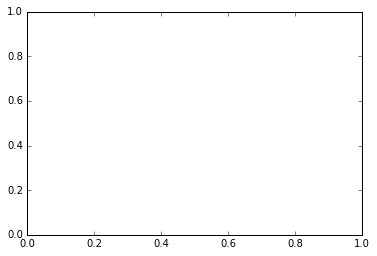

In [56]:
data = arrayed_data

# data = [[  66386,  174296,   75131,  577908,   32015],
#         [  58230,  381139,   78045,   99308,  160454],
#         [  89135,   80552,  152558,  497981,  603535],
#         [  78415,   81858,  150656,  193263,   69638],
#         [ 139361,  331509,  343164,  781380,   52269]]

columns = ('Freeze', 'Wind', 'Flood', 'Quake', 'Hail')
rows = ['%d year' % x for x in (100, 50, 20, 10, 5)]

values = np.arange(0, 2500, 500)
value_increment = 1000

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.array([0.0] * len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x/1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("Loss in ${0}'s".format(value_increment))
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('Loss by Disaster')

plt.show()